<a href="https://colab.research.google.com/github/almkrishna/CodTech-Tasks/blob/main/Task1_API_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data:
                   dt  main.temp  main.humidity  \
0 2025-10-10 12:00:00      26.49             68   
1 2025-10-10 15:00:00      23.35             80   
2 2025-10-10 18:00:00      19.60             88   
3 2025-10-10 21:00:00      20.33             88   
4 2025-10-11 00:00:00      20.75             90   

                                             weather weather_main  
0  [{'id': 501, 'main': 'Rain', 'description': 'm...         Rain  
1  [{'id': 501, 'main': 'Rain', 'description': 'm...         Rain  
2  [{'id': 501, 'main': 'Rain', 'description': 'm...         Rain  
3  [{'id': 501, 'main': 'Rain', 'description': 'm...         Rain  
4  [{'id': 501, 'main': 'Rain', 'description': 'm...         Rain  




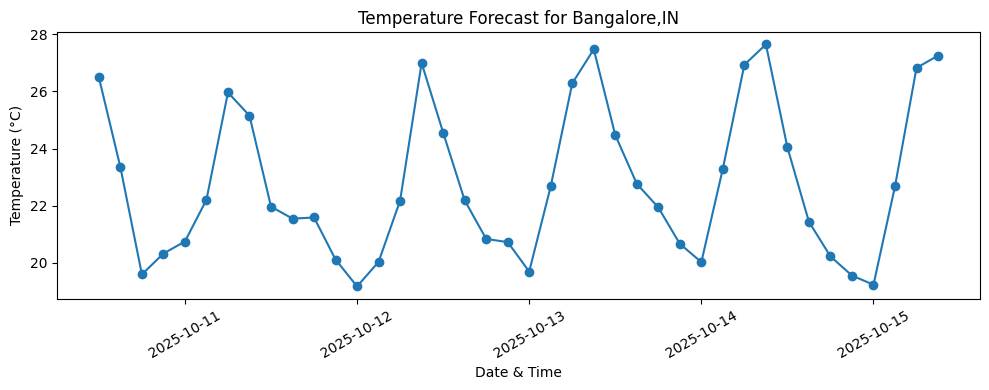

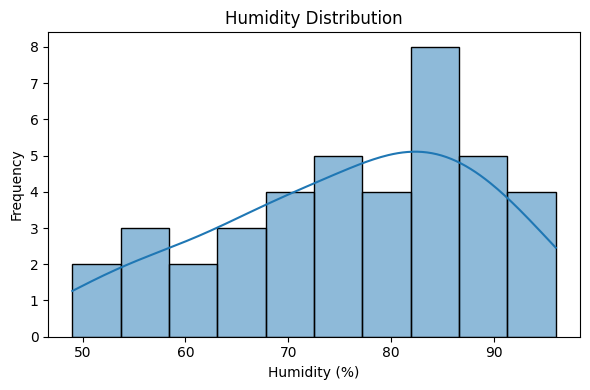

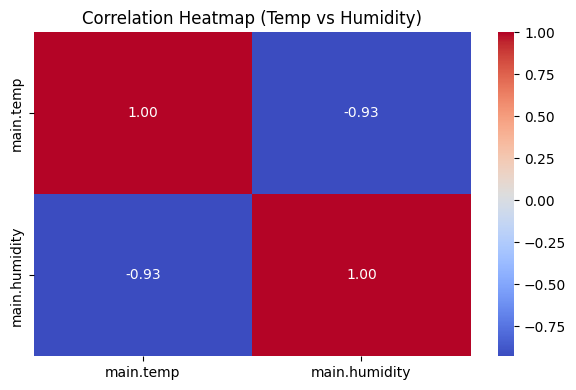

In [ ]:
# T1: API Integration and Data Visualization
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Fetch data from OpenWeatherMap API
API_KEY = '3b071b82355b9e9e1d48b50c19913d4f'
CITY = "Bangalore,IN"
url = f"https://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

response = requests.get(url)
data = response.json()

# 2. Normalize JSON into DataFrame
df = pd.json_normalize(data['list'])
df['dt'] = pd.to_datetime(df['dt'], unit='s')

# Keep only useful columns
df = df[['dt', 'main.temp', 'main.humidity', 'weather']]
df['weather_main'] = df['weather'].apply(lambda x: x[0]['main'])

print("Data:")
print(df.head())
print('\n')
# 3. Visualization

# Temperature time series
plt.figure(figsize=(10,4))
plt.plot(df['dt'], df['main.temp'], marker='o', linestyle='-')
plt.title(f"Temperature Forecast for {CITY}")
plt.xlabel("Date & Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
print('\n')
# Humidity distribution
plt.figure(figsize=(6,4))
sns.histplot(df['main.humidity'], bins=10, kde=True)
plt.title("Humidity Distribution")
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
print('\n')

heatmap_data = df[['main.temp', 'main.humidity']]

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Temp vs Humidity)")
plt.tight_layout()
plt.show()
